In [6]:
!wget = 'https://raw.githubusercontent.com/Doodies/Github-Stars-Predictor/master/PreprocessData.csv'

--2018-02-20 09:59:37--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2018-02-20 09:59:37--  https://raw.githubusercontent.com/Doodies/Github-Stars-Predictor/master/PreprocessData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18616347 (18M) [text/plain]
Saving to: ‘PreprocessData.csv’

PreprocessData.csv  100%[===================>]  17.75M  38.4MB/s    in 0.5s    

2018-02-20 09:59:38 (38.4 MB/s) - ‘PreprocessData.csv’ saved [18616347/18616347]

FINISHED --2018-02-20 09:59:38--
Total wall clock time: 0.9s
Downloaded: 1 files, 18M in 0.5s (38.4 MB/s)


In [7]:
!ls -lh

total 18M
drwxr-xr-x 1 root root 4.0K Feb 20 09:22 datalab
-rw-r--r-- 1 root root  18M Feb 20 09:59 PreprocessData.csv


# Importing required modules

In [0]:
!pip install catboost ipywidgets
!pip install xgboost
!pip install keras

In [2]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
color = sns.color_palette()
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
# mpl.style.use( 'ggplot' )
sns.set_style( 'whitegrid' )
pylab.rcParams[ 'figure.figsize' ] = 10,8
seed = 7

# importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

np.random.seed(seed)

Using Theano backend.


ImportError: No module named theano

In [5]:
data = pd.read_csv('../dataset/PreprocessData.csv').iloc[:, 1:]

In [6]:
X = data.drop(['stars'] , axis =1)
y = data.stars

# Feature normalization

In [0]:
s = StandardScaler()
X = s.fit_transform(X)

In [107]:
X

array([[-0.09745647,  0.00614558,  0.23250482, ..., -0.23044367,
        -0.22388323, -0.84232977],
       [-0.09745647, -0.08776201,  0.23293463, ..., -0.23044367,
        -0.22388323, -0.84232977],
       [-0.09745647, -0.09548965,  0.23228991, ..., -0.23044367,
        -0.22388323,  1.1871835 ],
       ...,
       [ 0.00197165, -0.0922978 ,  0.23218246, ..., -0.23044367,
        -0.22388323,  1.1871835 ],
       [-0.07259944, -0.11128091,  0.23223618, ..., -0.23044367,
        -0.22388323,  1.1871835 ],
       [-0.09745647, -0.10741709,  0.23304208, ..., -0.23044367,
        -0.22388323,  1.1871835 ]])

# train test data splitting

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [0]:
training_scores = []
test_scores = []
models = []


# Training Models

## 1. Gradient Boost

In [0]:
models.append("gradient boost")

In [18]:
reg = GradientBoostingRegressor(verbose = 1, n_estimators = 500)
reg.fit(X_train , y_train)

training_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

training_scores.append(training_score)
test_scores.append(test_score)
print("training set performance: ", training_score)
print("test set performance: ", test_score)

      Iter       Train Loss   Remaining Time 
         1     2314275.3681            2.45m
         2     2034234.0235            2.41m
         3     1803572.2337            2.37m
         4     1608749.3223            2.34m
         5     1445890.2822            2.33m
         6     1307594.0384            2.31m
         7     1188230.8595            2.30m
         8     1093410.7788            2.31m
         9     1009625.5156            2.30m
        10      942921.5465            2.30m
        20      596844.4649            2.25m
        30      497781.8140            2.22m
        40      452724.3501            2.20m
        50      423902.1842            2.17m
        60      400324.1880            2.14m
        70      384742.5304            2.11m
        80      371501.3233            2.07m
        90      360896.1303            2.02m
       100      351778.4518            1.97m
       200      292815.3392            1.45m
       300      262845.3144           57.60s
       40

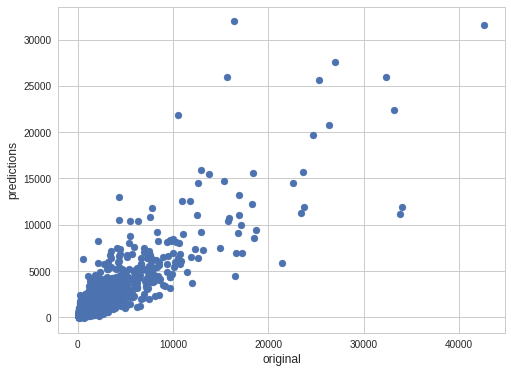

In [34]:
pred = reg.predict(X_test).astype(int)

temp1 = y_test.values > 0
# plt.axis((0,1000,0,1000))
plt.scatter(y_test.values[temp1], pred[temp1])
plt.xlabel("original", fontsize=12)
plt.ylabel("predictions", fontsize=12)
plt.show()

## 2. Cat Boost

In [0]:
models.append("cat boost")

In [0]:
model = CatBoostRegressor(iterations= 440 , depth= 8 , learning_rate= 0.1 , loss_function='RMSE' , use_best_model=True)
model.fit(X_train[:90503], y_train[:90503] , eval_set=(X_train[90503:], y_train[90503:]),plot=True)

In [48]:
y_train_pred  =  model.predict(X_train)
y_pred = model.predict(X_test)

train_score = r2_score(y_train , y_train_pred)
test_score = r2_score(y_test, y_pred)

training_scores.append(training_score)
test_scores.append(test_score)
print("Training score - " + str(train_score))
print("Test score - " + str(test_score))

Training score - 0.9466853308679932
Test score - 0.827240593918934


## 3. Random Forest

In [0]:
models.append("random forest")

In [81]:
model = RandomForestRegressor(n_jobs=-1, n_estimators=10, verbose=1, random_state=seed)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   21.9s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=7, verbose=1, warm_start=False)

In [82]:
training_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("training score: ", training_score)
print("test score: ", test_score)

('training score: ', 0.9621975488319267)
('test score: ', 0.7932394748872148)


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


In [0]:
training_scores.append(training_score)
test_scores.append(test_score)

## 4. Neural Network

In [0]:
models.append("neural network")

In [126]:
def baseline_model():
    model = Sequential()
    model.add(Dense(100,input_dim=54, activation='relu', kernel_initializer='glorot_normal'))
    model.add(Dropout(0.2))    
    model.add(Dense(80, activation='relu', kernel_initializer='glorot_normal'))
    model.add(Dropout(0.2))
    model.add(Dense(60, activation='relu', kernel_initializer='glorot_normal'))
    model.add(Dropout(0.2))   
    model.add(Dense(40, activation='relu', kernel_initializer='glorot_normal'))
    model.add(Dropout(0.2))
    model.add(Dense(20, activation='relu', kernel_initializer='glorot_normal'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='relu', kernel_initializer='glorot_normal'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='glorot_normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=200, epochs=10, batch_size=32, verbose=True)
# kfold = KFold(n_splits=10, random_state=seed)
# results = cross_val_score(estimator, X_train.values, y_train.values, cv=kfold)
# print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

estimator.fit(X_train, y_train)

Epoch 1/10
95503/95503 [==============================] - 23s 236us/step - loss: 1426592.9792
Epoch 2/10
80064/95503 [========================>.....] - ETA: 3s - loss: 1140652.504595503/95503 [==============================] - 22s 232us/step - loss: 2178143.3739
Epoch 3/10
95503/95503 [==============================] - 22s 234us/step - loss: 1195133.7699
Epoch 4/10
19328/95503 [=====>........................] - ETA: 17s - loss: 919646.060095503/95503 [==============================] - 22s 234us/step - loss: 999633.2443
Epoch 5/10
95503/95503 [==============================] - 22s 232us/step - loss: 862275.2634
Epoch 6/10
 3168/95503 [..............................] - ETA: 21s - loss: 466866.896795503/95503 [==============================] - 22s 231us/step - loss: 910655.6377
Epoch 7/10
93888/95503 [============================>.] - ETA: 0s - loss: 792743.879995503/95503 [==============================] - 22s 233us/step - loss: 802929.4407
Epoch 8/10
95503/95503 [=======================

In [127]:
train_pred = estimator.predict(X_train)
test_pred = estimator.predict(X_test)

training_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

print("training score: ", training_score)
print("test score: ", test_score)

10612/10612 [==============================] - 0s 45us/step
('training score: ', 0.8259016551067639)
('test score: ', 0.7981640331110263)


In [0]:
training_scores.append(training_score)
test_scores.append(test_score)

# Comparing all model's results

In [131]:
print(models)
print(training_scores)
print(test_scores)

['gradient boost', 'cat boost', 'random forest', 'neural network']
[0.7936297533635706, 0.7936297533635706, 0.9621975488319267, 0.8259016551067639]
[0.7696216055989064, 0.827240593918934, 0.7932394748872148, 0.7981640331110263]


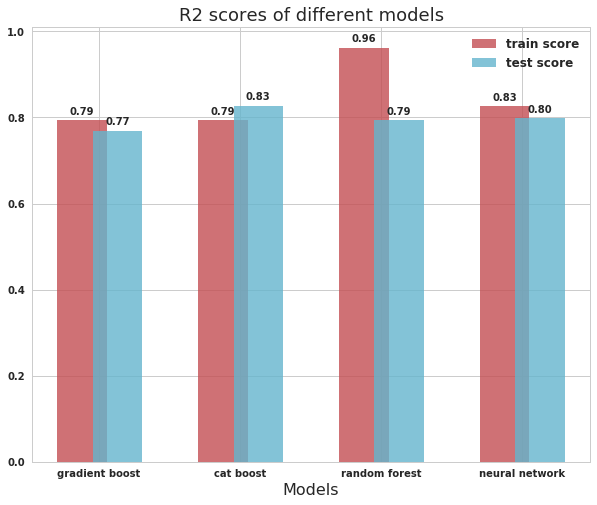

In [224]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

mpl.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
mpl.rc('axes', titlesize=18)     # fontsize of the axes title
mpl.rc('axes', labelsize=16)    # fontsize of the x and y labels
mpl.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
mpl.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
mpl.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
mpl.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

y_pos = np.arange(len(models))
rects1 = plt.bar(y_pos-0.12, training_scores, 0.35, alpha=0.8, color=color[2], label="train score")
rects2 = plt.bar(y_pos+0.13, test_scores, 0.35, alpha=0.8, color=color[5], label="test score")
plt.xticks(y_pos, models)
plt.xlabel('Models')
plt.title('R2 scores of different models')
plt.legend()

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%.2f' % float(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()